In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [2]:
# Read data
df = pd.read_csv('train (1).csv')
df['comment_text'] = df['comment_text'].apply(lambda x: x.replace('\n', ' '))

In [3]:
# One-hot encode
voc_size = 20000
df['comment_text'] = [one_hot(words, voc_size) for words in df['comment_text']]

In [4]:
# Pad sequences
sent_length = 180
x = pad_sequences(df['comment_text'], padding='pre', maxlen=sent_length)

In [5]:
# Extract labels
y = df.iloc[:, 2:].values

In [6]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [7]:
# Define the model
model = Sequential()
model.add(Embedding(voc_size, 32, input_length=sent_length))
model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\91989\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [10]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[early_stopping], batch_size=64)

Epoch 1/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 501s 305ms/step - accuracy: 0.7487 - loss: 0.1484 - val_accuracy: 0.9937 - val_loss: 0.0567
Epoch 2/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 473s 296ms/step - accuracy: 0.9720 - loss: 0.0542 - val_accuracy: 0.9937 - val_loss: 0.0551
Epoch 3/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 483s 303ms/step - accuracy: 0.9895 - loss: 0.0474 - val_accuracy: 0.9937 - val_loss: 0.0536
Epoch 4/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1095s 687ms/step - accuracy: 0.9922 - loss: 0.0449 - val_accuracy: 0.9937 - val_loss: 0.0555
Epoch 5/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 482s 302ms/step - accuracy: 0.9900 - loss: 0.0404 - val_accuracy: 0.9937 - val_loss: 0.0570
Epoch 6/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 482s 302ms/step - accuracy: 0.9932 - loss: 0.0377 - val_accuracy: 0.9937 - val_loss: 0.0639


In [42]:
# Evaluate the model
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary, target_names=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']))

998/998 ━━━━━━━━━━━━━━━━━━━━ 57s 57ms/step
               precision    recall  f1-score   support

        toxic       0.86      0.67      0.75      3091
 severe_toxic       0.00      0.00      0.00       345
      obscene       0.83      0.73      0.78      1681
       threat       0.00      0.00      0.00        90
       insult       0.73      0.66      0.69      1549
identity_hate       0.00      0.00      0.00       267

    micro avg       0.81      0.62      0.70      7023
    macro avg       0.40      0.34      0.37      7023
 weighted avg       0.74      0.62      0.67      7023
  samples avg       0.06      0.05      0.05      7023



C:\Users\91989\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91989\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91989\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# Optional: Plot training history
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Loss')

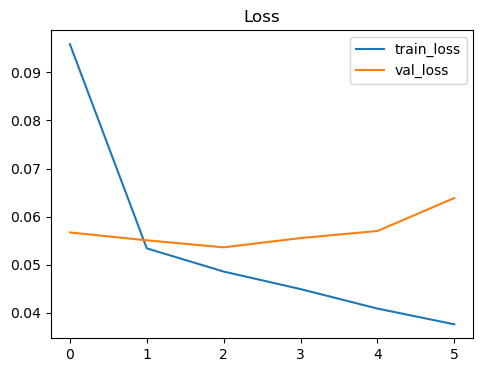

In [44]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')


Text(0.5, 1.0, 'Accuracy')

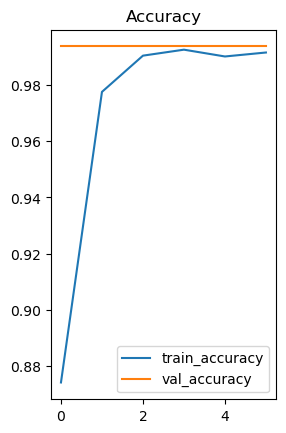

In [45]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy')

In [46]:
plt.show()

In [47]:
print(y_pred)

[[1.7736688e-01 6.5713091e-04 5.1603112e-02 1.3359817e-03 6.1120484e-02
  7.5526005e-03]
 [7.4919118e-03 7.2497166e-08 2.2540840e-04 1.2721009e-06 3.2826900e-04
  2.6855732e-05]
 [3.1411692e-03 4.5068219e-08 1.5279703e-04 5.0669189e-07 1.7167038e-04
  1.3410111e-05]
 ...
 [1.7302327e-03 6.2715557e-09 5.3296211e-05 7.5992475e-08 5.8063968e-05
  3.1721988e-06]
 [3.6698604e-01 2.0440766e-03 7.5610720e-02 8.6025046e-03 1.0897530e-01
  2.2670973e-02]
 [4.5946371e-03 3.8814495e-08 1.6475507e-04 4.3951260e-07 1.9775175e-04
  1.1332993e-05]]


In [48]:
print(y_pred_binary)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]


In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,y_pred_binary)

0.9154942816857277

In [178]:
sent = 'Hi! I am back again! Last warning! Stop undoing my edits or die!' 

In [179]:
word_encodings = []
word_encodings.append(one_hot(sent, voc_size)) 

In [180]:
print(word_encodings)

[[17583, 3677, 9479, 13552, 6995, 3448, 5032, 6736, 14934, 6737, 19854, 1991, 17922]]


In [181]:
word_encodings = pad_sequences(word_encodings, padding='pre', maxlen=sent_length)

In [182]:
print(word_encodings)

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0 

In [183]:
result_pred = model.predict(word_encodings)
result_pred_binary = (result_pred > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [184]:
print(result_pred)

[[0.6556719  0.0103706  0.20546152 0.03082154 0.28531134 0.06384296]]


In [185]:
print(result_pred_binary)

[[1 0 0 0 0 0]]
